# Decision Tress Classification

CART - Classification and egression Trees

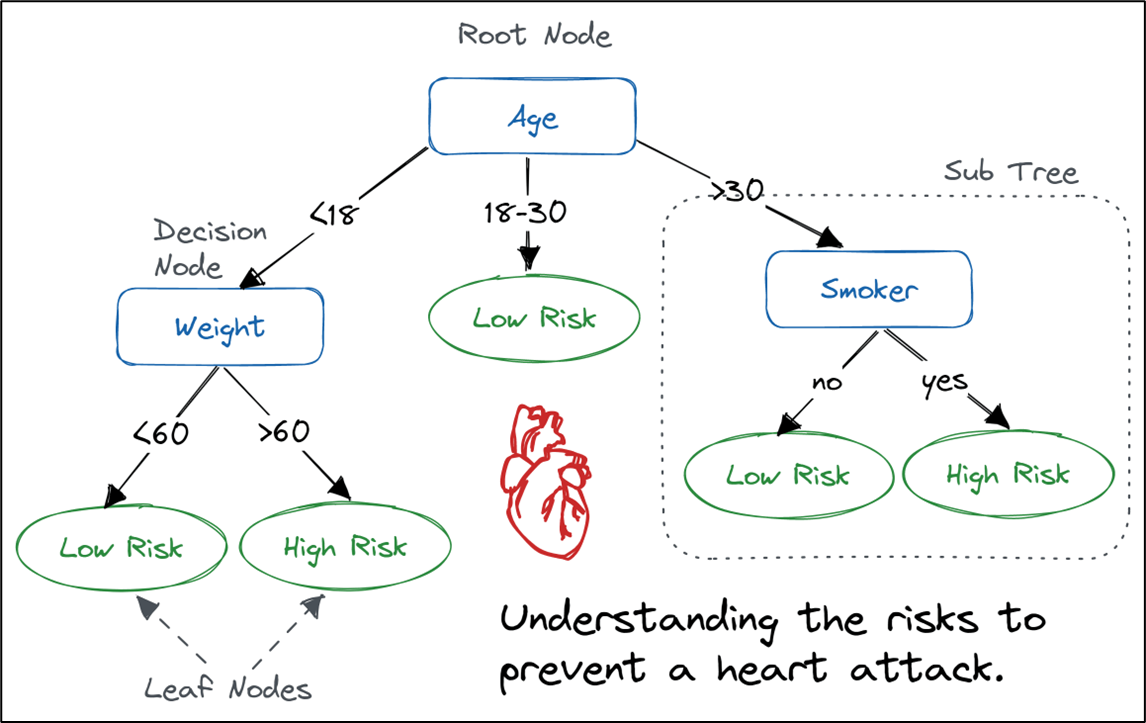

In [58]:
from warnings import filterwarnings
filterwarnings('ignore')

# Step 1 - Data INgestion

In [59]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Target Feature - Species
# Step 2 - Perform Basic Data quality checks

In [60]:
df.shape

(150, 5)

In [61]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [62]:
df.duplicated().sum()

np.int64(1)

In [63]:
df.drop_duplicates(keep='first').reset_index(drop=True)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,virginica
145,6.3,2.5,5.0,1.9,virginica
146,6.5,3.0,5.2,2.0,virginica
147,6.2,3.4,5.4,2.3,virginica


In [64]:
df.shape

(150, 5)

In [65]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

# Step 3 - Seperate X and Y(species)


In [66]:
X = df.drop(columns=["species"])
Y = df["species"]

In [67]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
Y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [69]:
Y.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='species'>

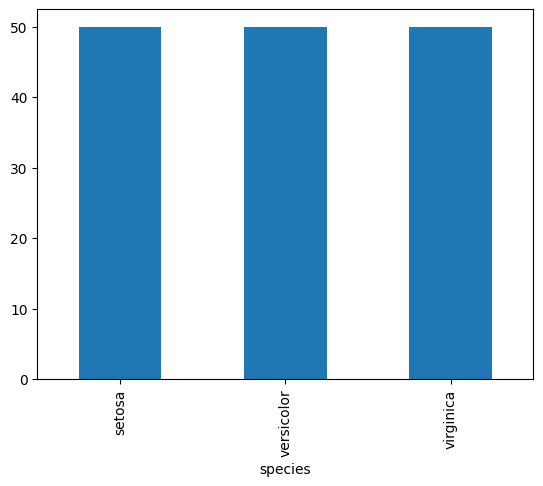

In [70]:
Y.value_counts().plot(kind='bar')

# Step 5 - Apply Train Test Split 

In [71]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain ,ytest = train_test_split(X,Y , test_size=0.33 , random_state=42)

In [72]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [73]:
ytrain.head()

96     versicolor
105     virginica
66     versicolor
0          setosa
122     virginica
Name: species, dtype: object

In [74]:

xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [75]:
ytest.head()


73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

In [76]:
xtrain.shape


(100, 4)

In [77]:
xtest.shape


(50, 4)

# Step 6 - Apply preprocessing


In [78]:
X.dtypes


sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [79]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [80]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"), 
    StandardScaler()
).set_output(transform="pandas")

In [81]:
num_pipe.fit(xtrain)


,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [82]:

xtrain_pre = num_pipe.transform(xtrain)
xtrain_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
96,-0.138356,-0.265508,0.222291,0.108949
105,2.147526,-0.026312,1.611608,1.184993
66,-0.258666,-0.026312,0.395955,0.377960
0,-0.860214,1.169672,-1.398579,-1.370611
122,2.267836,-0.504705,1.669496,1.050488


In [83]:

xtest_pre = num_pipe.transform(xtest)
xtest_pre.head()

,sepal_length,sepal_width,petal_length,petal_width
73,0.342882,-0.504705,0.511732,-0.025556
18,-0.138356,1.887263,-1.224914,-1.236105
118,2.267836,-0.983099,1.785272,1.454004
78,0.222573,-0.265508,0.395955,0.377960
76,1.185050,-0.504705,0.569620,0.243455


# Step 7 - Build the model


In [84]:
from sklearn.tree import DecisionTreeClassifier

model1 = DecisionTreeClassifier(
    max_depth=1,
    min_samples_split=5,
    min_samples_leaf=5,
    criterion="gini",
    random_state=42,
)
model1.fit(xtrain_pre, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [85]:
model1.score(xtrain_pre, ytrain)


0.66

In [86]:
model1.score(xtest_pre, ytest)


0.68

 # Hyperparameter tuning


In [87]:
params = {
    "max_depth": [2, 3, 4, 5, 6],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
    "criterion": ["gini", "entropy"],
}

In [88]:
from sklearn.model_selection import GridSearchCV

dtc = DecisionTreeClassifier(random_state=42)
gscv = GridSearchCV(dtc, params, cv=5, scoring="f1_macro")
gscv.fit(xtrain_pre, ytrain)

,estimator,DecisionTreeC...ndom_state=42)
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [2, 3, ...], 'min_samples_leaf': [5, 6, ...], 'min_samples_split': [5, 6, ...]}"
,scoring,'f1_macro'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [89]:
gscv.best_params_


{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 5,
 'min_samples_split': 5}

In [90]:
gscv.best_score_


np.float64(0.9223826173826174)

In [91]:
best_dtc = gscv.best_estimator_
best_dtc

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


# Evaluate the best model in detail


In [92]:
best_dtc.score(xtrain_pre, ytrain)


0.96

In [93]:
best_dtc.score(xtest_pre, ytest)


1.0

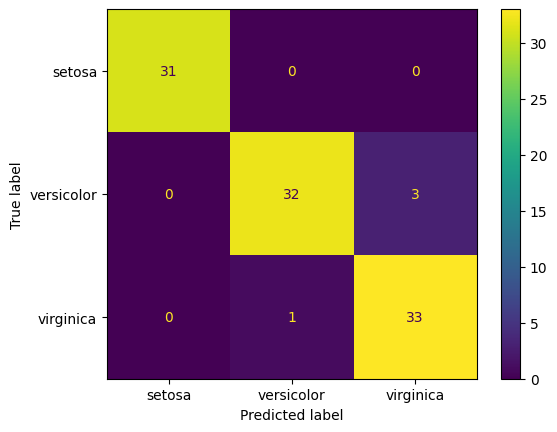

In [94]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(best_dtc, xtrain_pre, ytrain)

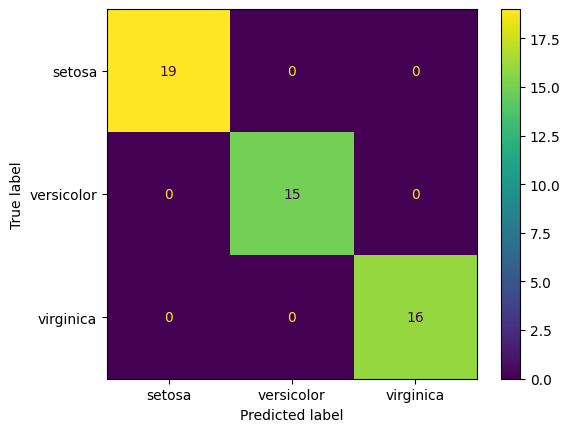

In [95]:
ConfusionMatrixDisplay.from_estimator(best_dtc, xtest_pre, ytest)


In [96]:

ypred_test = best_dtc.predict(xtest_pre)
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [97]:
ytest.head()


73     versicolor
18         setosa
118     virginica
78     versicolor
76     versicolor
Name: species, dtype: object

In [98]:

from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Step 8 - Out of sample prediction


In [99]:

xnew = pd.read_csv("iris_sample.csv")
xnew

,sepal_length,sepal_width,petal_length,petal_width
0,5.5,2.5,4.0,1.3
1,6.9,3.1,5.1,2.3
2,5.1,2.5,3.0,1.1
3,4.4,2.9,NaN,0.2
4,5.9,3.0,5.1,1.8
5,5.5,3.5,1.3,0.2
6,5.6,NaN,3.6,1.3
7,6.5,3.0,5.2,2.0
8,5.3,3.7,1.5,0.2
9,5.1,3.4,1.5,NaN


In [100]:
num_pipe


,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [101]:

xnew_pre = num_pipe.transform(xnew)
xnew_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.378975,-1.222296,0.106514,0.108949
1,1.305359,0.212885,0.743285,1.454004
2,-0.860214,-1.222296,-0.472368,-0.160062
3,-1.702381,-0.265508,0.251235,-1.370611
4,0.102263,-0.026312,0.743285,0.781477
5,-0.378975,1.169672,-1.456467,-1.370611
6,-0.258666,-0.026312,-0.125039,0.108949
7,0.824121,-0.026312,0.801173,1.050488
8,-0.619594,1.648066,-1.340691,-1.370611
9,-0.860214,0.930476,-1.340691,0.108949


In [102]:
preds = best_dtc.predict(xnew_pre)
preds

array(['versicolor', 'virginica', 'versicolor', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'versicolor', 'virginica'],
      dtype=object)

In [103]:

probs = best_dtc.predict_proba(xnew_pre)
probs

array([[0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [1.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.        , 1.        ],
       [0.        , 0.96969697, 0.03030303],
       [0.        , 0.4       , 0.6       ]])

In [104]:
best_dtc.classes_


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [105]:

xnew["species"] = preds
xnew[best_dtc.classes_] = probs.round(2)

In [106]:
xnew


,sepal_length,sepal_width,petal_length,petal_width,species,setosa,versicolor,virginica
0,5.5,2.5,4.0,1.3,versicolor,0.0,0.97,0.03
1,6.9,3.1,5.1,2.3,virginica,0.0,0.00,1.00
2,5.1,2.5,3.0,1.1,versicolor,0.0,0.97,0.03
3,4.4,2.9,NaN,0.2,versicolor,0.0,0.97,0.03
4,5.9,3.0,5.1,1.8,virginica,0.0,0.00,1.00
5,5.5,3.5,1.3,0.2,setosa,1.0,0.00,0.00
6,5.6,NaN,3.6,1.3,versicolor,0.0,0.97,0.03
7,6.5,3.0,5.2,2.0,virginica,0.0,0.00,1.00
8,5.3,3.7,1.5,0.2,setosa,1.0,0.00,0.00
9,5.1,3.4,1.5,NaN,setosa,1.0,0.00,0.00


In [107]:
xnew.to_csv("results.csv", index=False)


In [108]:
xnew["species"].value_counts()


species
versicolor    7
virginica     5
setosa        3
Name: count, dtype: int64

<Axes: xlabel='species'>

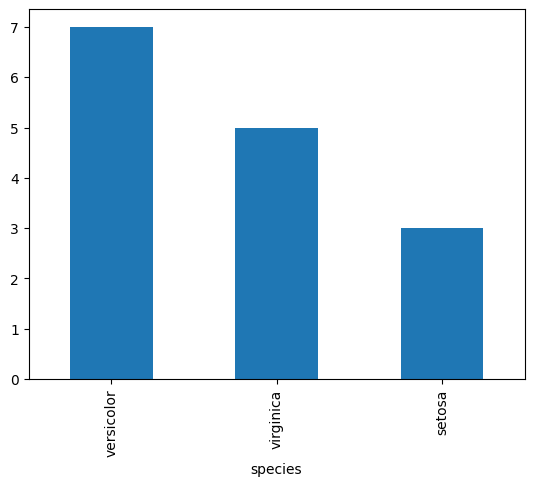

In [109]:
xnew["species"].value_counts().plot(kind="bar")


# Plotting Decision tree and Feature importance

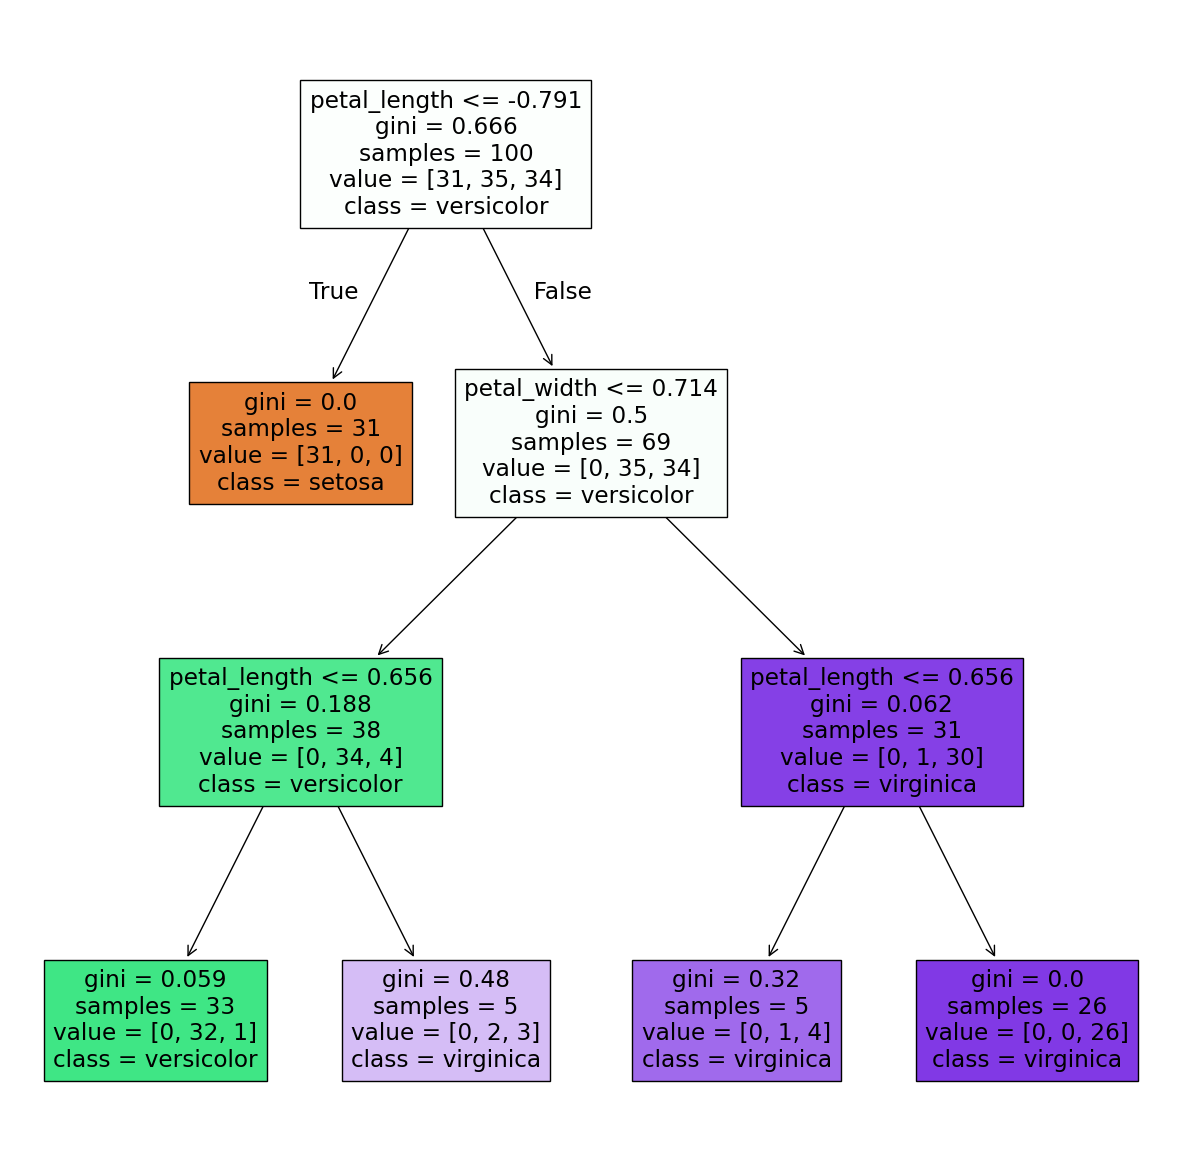

In [110]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))
plot_tree(
    best_dtc, feature_names=xtrain.columns, class_names=best_dtc.classes_, filled=True
)
plt.show()

In [111]:
best_dtc.feature_importances_


array([0.        , 0.        , 0.58114906, 0.41885094])

In [112]:
xtrain.columns


Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [113]:
imp = pd.Series(best_dtc.feature_importances_, index=xtrain.columns)
imp


sepal_length    0.000000
sepal_width     0.000000
petal_length    0.581149
petal_width     0.418851
dtype: float64

In [114]:
imp.sort_values(ascending=False)


petal_length    0.581149
petal_width     0.418851
sepal_width     0.000000
sepal_length    0.000000
dtype: float64

<Axes: >

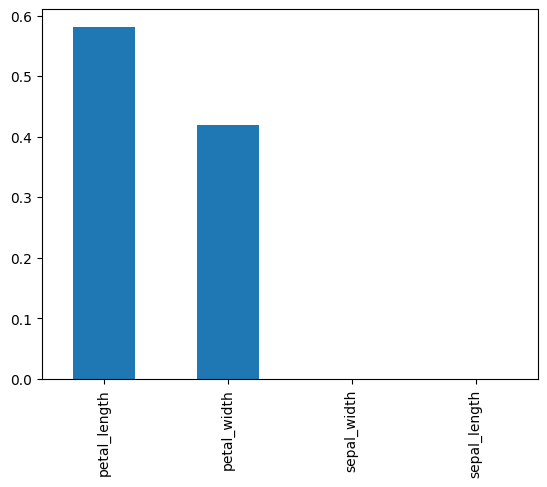

In [115]:
imp.sort_values(ascending=False).plot(kind="bar")


# Step 9 - Save the pre and model



In [116]:

import joblib

joblib.dump(num_pipe, "pre.joblib")

['pre.joblib']

In [117]:
joblib.dump(best_dtc, "iris_model.joblib")


['iris_model.joblib']

# Loading model objects and pre


In [118]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [119]:
p = joblib.load("pre.joblib")
p

,steps,"[('simpleimputer', ...), ('standardscaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [121]:
m = joblib.load("iris_model.joblib")


In [122]:
m


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,5
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None
